In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment.


In [2]:
#reading the csv file
data=pd.read_excel('iris (1).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.

### Checking for missing values and filling them,if any

In [6]:
#looking if there is any null value
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:xlabel='SL'>

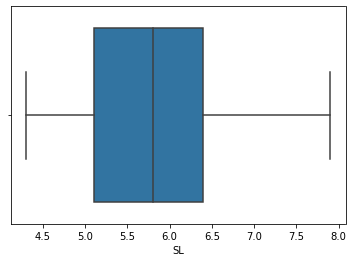

In [7]:
#filling missing values
#checking skewness
sns.boxplot(data['SL'])

In [8]:
print(data['SL'].skew())

0.3068227108046868


<AxesSubplot:xlabel='SW'>

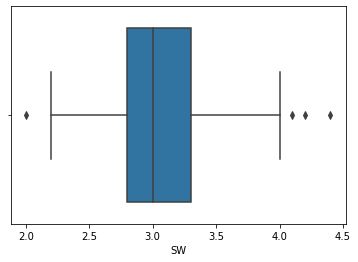

In [9]:
sns.boxplot(data['SW'])

In [10]:
print(data['SW'].skew())

0.37781843718771746


<AxesSubplot:xlabel='PL'>

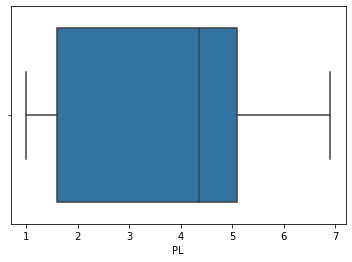

In [11]:
sns.boxplot(data['PL'])

In [12]:
print(data['PL'].skew())

-0.2689053923783847


We can fill the missing values in 'SL', 'SW', and 'PL' with mean values of their respective columns.

In [13]:
for i in ['SL','PL']:
    data[i]=data[i].fillna(data[i].mean())
data['SW']=data['SW'].fillna(data['SW'].median())    

In [14]:
#checking for missing values again
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now the missing values are filled.

Next we check for the outliers

### Checking outliers in SL

{'whiskers': [<matplotlib.lines.Line2D at 0x2121ebd9bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2121ebe6310>,
 'boxes': [<matplotlib.lines.Line2D at 0x2121ebd97f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2121ebe6a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2121ebe6dc0>],
 'means': []}

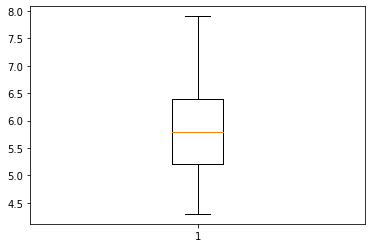

In [15]:
#plotting boxplot to find whether there are outliers
plt.boxplot(data['SL'])


In [16]:
print(data['SL'].skew())

0.31408636509509497


There are no outliers in SL

### Checking outliers in SW

{'whiskers': [<matplotlib.lines.Line2D at 0x2121ec4f880>,
 'caps': [<matplotlib.lines.Line2D at 0x2121ec4ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2121ec4f4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2121ec5b730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2121ec5bac0>],
 'means': []}

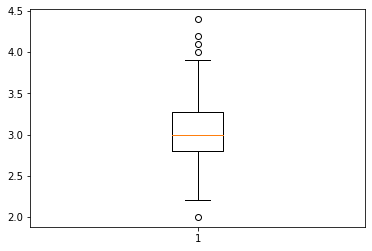

In [17]:
#plotting boxplot to find whether there are outliers
plt.boxplot(data['SW'])

In [18]:
print(data['SW'].skew())

0.3992861923982765


There are outliers in SW.So we need to manage them using IQR.

In [19]:
#finding the quartiles Q1,Q2,Q3
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [20]:
#finding IQR
IQR=Q3-Q1
print(IQR)

0.4500000000000002


In [21]:
#finding the lower limit and upper limit
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

2.1249999999999996
3.9250000000000003


Now using this limits,we find the outliers. The values greater than the upper limit or lesser than the lower limit form outliers

In [22]:
#using for loop to find outliers
outlier=[]
for x in data['SW']:
    if((x>up_limit or x<low_limit)):
        outlier.append(x)
len(outlier)        

5

So there are 4 outliers.

In [23]:
#taking the index values
ind1=data['SW']>up_limit
drop_values1=data.loc[ind1].index
len(drop_values1)

4

In [24]:
ind2=data['SW']<low_limit
drop_values2=data.loc[ind2].index
len(drop_values2)

1

In [25]:
#droping those values using index values
data.drop(drop_values1,inplace=True)
data.drop(drop_values2,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2121ecb45b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2121ecd2220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2121ecc3850>],
 'medians': [<matplotlib.lines.Line2D at 0x2121ecd2940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2121ecd2cd0>],
 'means': []}

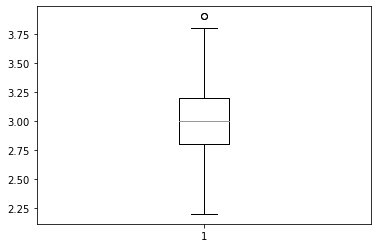

In [26]:
#checking whether outliers is removed using boxplot
plt.boxplot(data['SW'])

### Checking outliers in PL

{'whiskers': [<matplotlib.lines.Line2D at 0x2121ed2ddf0>,
 'caps': [<matplotlib.lines.Line2D at 0x2121ed3e550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2121ed2da60>],
 'medians': [<matplotlib.lines.Line2D at 0x2121ed3ec70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2121ed49040>],
 'means': []}

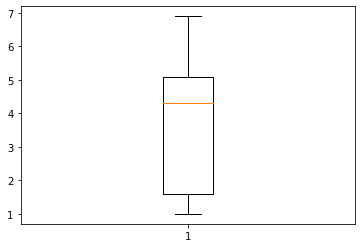

In [27]:
#plotting boxplot to find whether there are outliers
plt.boxplot(data['PL'])

In [28]:
print(data['PL'].skew())

-0.336689477729074


There are no outliers in PL

### Checking outliers in PW

{'whiskers': [<matplotlib.lines.Line2D at 0x2121ed927f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2121edb2430>,
 'boxes': [<matplotlib.lines.Line2D at 0x2121eda2a60>],
 'medians': [<matplotlib.lines.Line2D at 0x2121edb2b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2121edb2ee0>],
 'means': []}

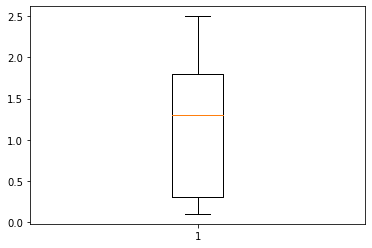

In [29]:
#plotting boxplot to find whether there are outliers
plt.boxplot(data['PW'])

In [30]:
print(data['PW'].skew())

-0.16218348911483513


There is no outliers in PW

In [31]:
#checking data of objects
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

#### Label encoding of Classification

In [32]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])
data    

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [33]:
data['Classification'].value_counts()

2    50
1    49
0    46
Name: Classification, dtype: int64

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [34]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


<AxesSubplot:>

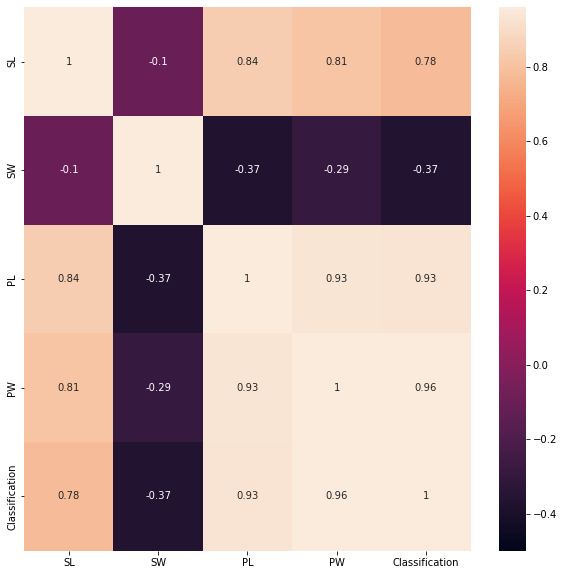

In [35]:
#representing correlation using heatmap
corrmatrix=data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,vmin=-0.5,vmax=0.96,annot=True)

In [36]:
#Splitting the data
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [37]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

## kNN

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [39]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [40]:
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

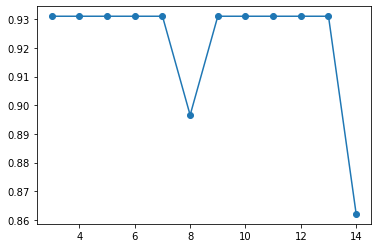

In [41]:
#plotting graph to find k value
plt.plot(neighbors,acc_values,'o-')

From the above plot, we can see that k at 3,4,5,6,7,9,10,11,12 and 13 produce models with highest accuracy. We choose any one of the k values, say k =12.

In [42]:
classifier= KNeighborsClassifier(n_neighbors=12,metric="minkowski")
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
   

In [43]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))

Accuracy_score :  0.9310344827586207


In [44]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [46]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))

Accuracy_score :  0.896551724137931


In [47]:
confusion_matrix(y_test,y_pred)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [49]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))

Accuracy_score :  0.896551724137931


In [50]:
confusion_matrix(y_test,y_pred)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

## SVM

#### Linear kernel

In [51]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [52]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))

Accuracy_score :  0.896551724137931


In [53]:
confusion_matrix(y_test,y_pred)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

#### Polynomial kernel

In [54]:
from sklearn.svm import SVC
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [55]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))

Accuracy_score :  0.9655172413793104


In [56]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

#### Radial kernel

In [57]:
from sklearn.svm import SVC
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [58]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))

Accuracy_score :  0.8620689655172413


In [59]:
confusion_matrix(y_test,y_pred)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 3, 8]], dtype=int64)

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [61]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))

Accuracy_score :  0.896551724137931


In [62]:
confusion_matrix(y_test,y_pred)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

From all the classification model SVM polynomial kernel is more accurate.